# Homework
 Write a function that divides an image into non-overlapping blocks (e.g., 8x8 or 16x16) 
 and applies a simple pixel manipulation technique such as averaging or quantization to each block. 
 You should reduce the color precision within each block while preserving 
 structural information (for example, reducing the number of unique colors per block).

#### Please follow the following guidelines:
 - Use python code.
 - Do not attach any files, submit only the code that takes the input image indicated below and produces an output image saved as "img.jpg".
 - If possible, use only opencv-python, scikit-image and numpy.
 - Make sure your code is properly indented and commented, and executable with Python >= 3.8.
 - Use the following code to load the image as a numpy array:

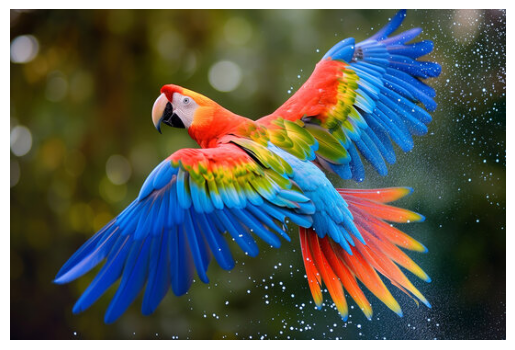

In [26]:
from skimage import io
import cv2
import matplotlib.pyplot as plt   # just for representation purposes

# Reading image
img = io.imread('https://t4.ftcdn.net/jpg/07/18/12/87/360_F_718128776_nJReWqPkf5qF4Y5na8ZqGWAbdCJTpczZ.jpg')

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [27]:
# Getting image dimensions
height, width, _ = img.shape


print(height)
print(width)

360
540


In [28]:
# Now lets choose the subdivision size of the image

m, n = 8, 8 

height_subdivision = height // m
width_subdivision = width // n

print(height_subdivision)
print(width_subdivision)

45
67


In [43]:
subdivisions = []

for i in range(m):
    for j in range(n):
        y1, y2 = i * height_subdivision, (i + 1) * height_subdivision
        x1, x2 = j * width_subdivision, (j + 1) * width_subdivision
        block = img[y1:y2, x1:x2]
        subdivisions.append(block)

In [39]:
### Quantization

quantization_step = 15 # supposedly there is 64 levels of quantization

# Applying the quantization to the blocks
quantized_blocks = []
for block in subdivisions:
    quantized_block = (block // quantization_step) * quantization_step  # Quantization
    quantized_blocks.append(quantized_block)


### Averaging blur

kernel_size = 9  # Size of the averaging kernel

# Apply averaging blur to each block
blurred_blocks = []
for block in subdivisions:
    blurred_block = cv2.blur(block, (kernel_size, kernel_size))  # Averaging blur
    blurred_blocks.append(blurred_block)

### Combined Steps for both

processed_blocks = []
for block in subdivisions:
    # Step 1: Apply quantization
    quantized_block = (block // quantization_step) * quantization_step
    
    # Step 2: Apply averaging blur
    processed_block = cv2.blur(quantized_block, (kernel_size, kernel_size))
    
    # Store the processed block
    processed_blocks.append(processed_block)


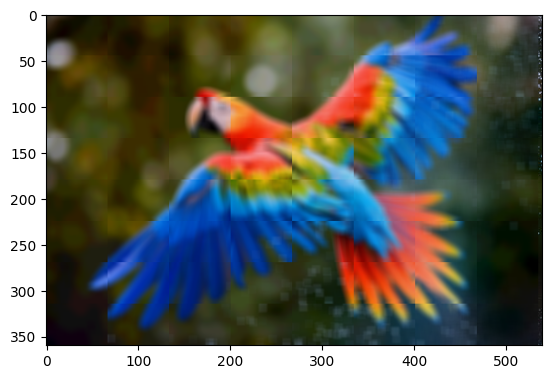

In [40]:
# Create a new blank image to hold the processed result
processed_img = img.copy()

# Reinsert each processed block back into the image
index = 0
for i in range(m):
    for j in range(n):
        y1, y2 = i * height_subdivision, (i + 1) * height_subdivision
        x1, x2 = j * width_subdivision, (j + 1) * width_subdivision

        # Replace the region with the processed block
        processed_img[y1:y2, x1:x2] = processed_blocks[index]
        index += 1

# Matplotlib show
plt.imshow(processed_img)
plt.show()


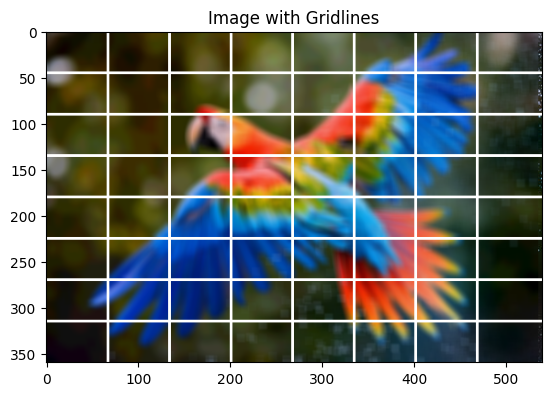

In [42]:
# We can also checkout the gridlines for the blocks we have chosen here: (YES I KNOW IT IS NOT NEEDED BUT JUST FOR VISUALIZATION PURPOSES)

# Create a copy of the image for drawing gridlines
grid_img = processed_img.copy()

# Draw horizontal gridlines
for i in range(1, m):  # Start from 1 to avoid drawing on the edges
    y = i * height_subdivision
    cv2.line(grid_img, (0, y), (width, y), color=(255, 255, 255), thickness=2)  # Horizontal line

# Draw vertical gridlines
for j in range(1, n):  # Start from 1 to avoid drawing on the edges
    x = j * width_subdivision
    cv2.line(grid_img, (x, 0), (x, height), color=(255, 255, 255), thickness=2)  # Vertical line

# Display the image with gridlines
plt.imshow(grid_img)
plt.title("Image with Gridlines")
plt.show()